# Difference-in-Means Testing
# Scenario 3: Uniform distributions with disjoint overlap

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import json
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), 'scripts'))
from bet_co96 import call_process_co96
from bet_oj23 import call_process_oj23
from bet_ons import call_process_ons
from bet_ftrl_barrier import call_process_ftrl
from bet_optftrl_barrier import call_process_optftrl

from scipy.stats import truncnorm
np.random.seed(100) #reproducible

In [3]:
def sample_truncated_normal(mu, sigma, size):
    # Truncate to [0, 1]
    a, b = (0 - mu) / sigma, (1 - mu) / sigma
    return truncnorm.rvs(a, b, loc=mu, scale=sigma, size=size)

In [4]:
# Scenario 3: Uniform distributions with disjoint overlap
t     = 1500
iters = 300

# **H1** scenario
y1 = np.random.uniform(0.2, 0.4, size=(iters, t)  )
y2 = np.random.uniform(0.7, 0.9, size=(iters, t)  )

# **H0** scenario
z1 = y1[:,:500]
z2 = np.random.uniform(0, 0.6, size=(iters, 500)  )

In [5]:
y1 = np.array(y1)
y2 = np.array(y2)
z1 = np.array(z1)
z2 = np.array(z2)

alphas=np.linspace(0.005, 0.1, 20)
output_file='./results/unif_disjoint_overlap.json'
call_process_ons(y1, y2, z1, z2, alphas, iters, output_file)
call_process_ftrl(y1, y2, z1, z2, alphas, iters, output_file)
call_process_optftrl(y1, y2, z1, z2, alphas, iters, output_file)
call_process_co96(y1, y2, z1, z2, alphas, iters, output_file)
call_process_oj23(y1, y2, z1, z2, alphas, iters, output_file)

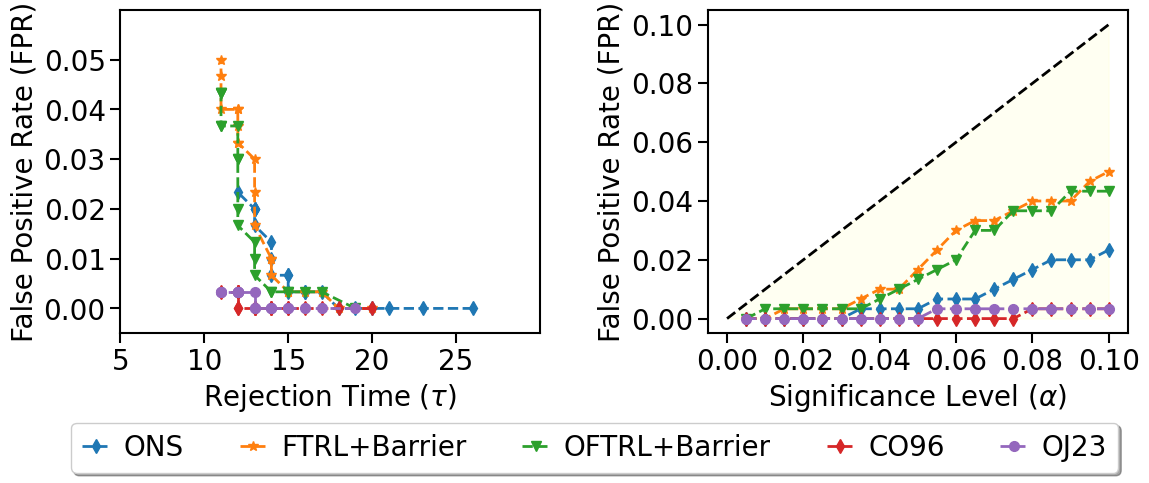

In [11]:
df_list = []

with open('./results/unif_disjoint_overlap.json', 'r') as file:
    items = json.load(file)


for item in items:
    df = pd.DataFrame({
        'rejection_time': item['rejection_time'],
        'fpr': item['fpr'],
        'name': item['method'], 
        'alpha': np.linspace(0.005, 0.1, len(item['fpr']))  
    })
    df_list.append(df)


fig, ax = plt.subplots(1, 2, figsize=(13, 4.2))  
i = 0
markers = ["d", "*", "v", "d", "o"]

 # Medium Aquamarine, Crimson

for df in df_list:
    ax[0].plot(df['rejection_time'], df['fpr'],ls='--', lw=2,  marker=markers[i], label=df['name'].iloc[0], markersize=7)
    ax[1].plot(df['alpha'], df['fpr'], ls='--', lw=2, marker=markers[i],label=df['name'].iloc[0], markersize=7)
    i += 1

ax[0].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[0].set_ylim(-0.005,0.060)
ax[0].set_yticks(np.arange(0,0.060,0.01))
ax[0].set_xlim(5,30)
ax[0].set_xticks(np.arange(5,30, 5))
ax[0].set_xlabel(r'Rejection Time ($\tau$)', fontsize=20)
ax[0].set_ylabel('False Positive Rate (FPR)', fontsize=20)
x = np.linspace(0, 0.1, 500)
y = x 
ax[1].fill_between(x, 0, y, color='yellow', alpha=0.05, zorder=1)  
ax[1].set_ylim(-0.005,0.105)
ax[1].set_yticks(np.arange(0,0.105,0.02))
ax[1].set_xlim(-0.005,0.105)
ax[1].set_xticks(np.arange(0,0.105,0.02))
ax[1].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[1].plot([0, 0.1], [0, 0.1], color='k', ls='--',  lw=2)
ax[1].set_xlabel(r'Significance Level ($\alpha$)', fontsize=20)
ax[1].set_ylabel('False Positive Rate (FPR)', fontsize=20)
handles, labels = next(ax.flat).get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.49, -0.07), fancybox=True, shadow=True,
             ncol=5, fontsize=20, labelspacing=0.1, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.4)  
for axis in ax:  
    for spine in axis.spines.values():
        spine.set_linewidth(1.5)  

plt.savefig('./plot_results/unif_disjoint_overlap.png', dpi=300, bbox_inches='tight')  


In [7]:
df_list

[    rejection_time       fpr name  alpha
 0             26.0  0.000000  ONS  0.005
 1             23.0  0.000000  ONS  0.010
 2             21.0  0.000000  ONS  0.015
 3             20.0  0.000000  ONS  0.020
 4             19.0  0.000000  ONS  0.025
 5             18.0  0.000000  ONS  0.030
 6             17.0  0.003333  ONS  0.035
 7             16.0  0.003333  ONS  0.040
 8             16.0  0.003333  ONS  0.045
 9             15.0  0.003333  ONS  0.050
 10            15.0  0.006667  ONS  0.055
 11            15.0  0.006667  ONS  0.060
 12            14.0  0.006667  ONS  0.065
 13            14.0  0.010000  ONS  0.070
 14            14.0  0.013333  ONS  0.075
 15            13.0  0.016667  ONS  0.080
 16            13.0  0.020000  ONS  0.085
 17            13.0  0.020000  ONS  0.090
 18            13.0  0.020000  ONS  0.095
 19            12.0  0.023333  ONS  0.100,
     rejection_time       fpr          name  alpha
 0             20.0  0.000000  FTRL+Barrier  0.005
 1             